### About the Kidney Datasets

Chromic Kidney disease is a major public health problem with growing challenges for its early diagnosis, timely prevention and effective treatment. The data was taken over a 2 month period in India with 25 features. The target is the class which is either 'ckd' or 'notckd'. There are 400 rows in total. This data comes with unclear titles so a renaming has to take place. Filling of the data is very essential because there are so many null values. 

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
kidney_data = pd.read_csv('kidney_disease.csv')

In [3]:
#data cleaning
kidney_data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
kidney_data.rename(columns={'bp': 'blood_pressure', 'sg': 'specific gravity','al':'albumin','su':'sugar','rbc':'red blood cells','pc':'pus cell','pcc':'pus cell clumps','ba':'bacteria','bgr':'blood glucose random','bu':'blood urea','sc':'serum creatinine','sod':'sodium','pot':'potassium','hemo':'hemoglobin','pcv':'packed cell volume','wc':'white blood cell count','rc':'red blood cell count','htn':'hypertension','dm':'diabetes mellitus','cad':'coronary artery disease','appet':'appetite','pe':'pedal edema','ane':'anemia','classification':'class'},inplace=True)

In [5]:
kidney_data.head()

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
kidney_data.tail()

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [7]:
kidney_data.shape

(400, 26)

In [8]:
kidney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red blood cells          248 non-null    object 
 7   pus cell                 335 non-null    object 
 8   pus cell clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood glucose random     356 non-null    float64
 11  blood urea               381 non-null    float64
 12  serum creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [9]:
kidney_data.isnull().sum()

id                           0
age                          9
blood_pressure              12
specific gravity            47
albumin                     46
sugar                       49
red blood cells            152
pus cell                    65
pus cell clumps              4
bacteria                     4
blood glucose random        44
blood urea                  19
serum creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed cell volume          70
white blood cell count     105
red blood cell count       130
hypertension                 2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

In [10]:
kidney_data.duplicated().sum()

0

In [11]:
kidney_data.describe()

,id,age,blood_pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [12]:
kidney_data = kidney_data.fillna(kidney_data.mean()) #filling the numerical using mean

In [13]:
kidney_data.isnull().sum()

id                           0
age                          0
blood_pressure               0
specific gravity             0
albumin                      0
sugar                        0
red blood cells            152
pus cell                    65
pus cell clumps              4
bacteria                     4
blood glucose random         0
blood urea                   0
serum creatinine             0
sodium                       0
potassium                    0
hemoglobin                   0
packed cell volume          70
white blood cell count     105
red blood cell count       130
hypertension                 2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

In [14]:
kidney_data.drop('id', axis = 1, inplace = True) #dropping id column

In [15]:
kidney_data['packed cell volume'] = pd.to_numeric(kidney_data['packed cell volume'], errors ='coerce')
kidney_data['white blood cell count'] = pd.to_numeric(kidney_data['white blood cell count'],  errors ='coerce')
kidney_data['red blood cell count'] = pd.to_numeric(kidney_data['red blood cell count'], errors ='coerce')
kidney_data['age'] = kidney_data['age'].astype('int') #changing the datatypes to numeric and integer because 
#they were integers in objects and float

In [16]:
#filling the null values of each categorical column with the most common values
kidney_data = kidney_data.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [17]:
kidney_data.isnull().sum()

age                        0
blood_pressure             0
specific gravity           0
albumin                    0
sugar                      0
red blood cells            0
pus cell                   0
pus cell clumps            0
bacteria                   0
blood glucose random       0
blood urea                 0
serum creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed cell volume         0
white blood cell count     0
red blood cell count       0
hypertension               0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

In [18]:
kidney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    int64  
 1   blood_pressure           400 non-null    float64
 2   specific gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red blood cells          400 non-null    object 
 6   pus cell                 400 non-null    object 
 7   pus cell clumps          400 non-null    object 
 8   bacteria                 400 non-null    object 
 9   blood glucose random     400 non-null    float64
 10  blood urea               400 non-null    float64
 11  serum creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  hemoglobin               4

In [19]:
#to check for Outliers
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(kidney_data[['blood_pressure', 'specific gravity', 'albumin', 'age', 'sugar','blood glucose random',
                             'blood urea', 'serum creatinine', 'sodium', 'potassium', 'hemoglobin', 'packed cell volume',
                             'white blood cell count', 'red blood cell count']]))
z

,blood_pressure,specific gravity,albumin,age,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count
0,0.262338,0.483355,0.013338,0.204820,0.437797,0.361987,0.435268,0.333743,0.000000,6.307513e-16,1.059271,0.579397,0.376051,0.380521
1,1.966580,0.483355,2.347516,2.623145,0.437797,0.000000,0.800941,0.405039,0.000000,6.307513e-16,0.452097,0.154017,1.069944,0.380521
2,0.262338,1.381391,0.773613,0.620949,2.479925,3.681441,0.089909,0.226800,0.000000,6.307513e-16,1.078762,1.009667,0.491700,0.380521
3,0.480635,2.313764,2.347516,0.204820,0.437797,0.415543,0.028964,0.129677,2.885831,7.553446e-01,0.488960,0.887431,0.800097,1.112845
4,0.262338,1.381391,0.773613,0.027870,0.437797,0.562820,0.638420,0.298096,0.000000,6.307513e-16,0.341509,0.520724,0.568799,0.308725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.262338,0.483355,0.800290,0.208064,0.437797,0.107600,0.171170,0.458510,1.356638,9.685073e-02,1.169859,0.946104,0.800097,0.035898
396,0.480635,1.415727,0.800290,0.558721,0.437797,0.977874,0.536844,0.333743,0.377606,4.002632e-01,1.464760,1.801754,0.376051,1.529265
397,0.262338,0.483355,0.800290,2.328227,0.437797,0.643153,0.638420,0.440686,0.057519,8.068997e-02,1.206722,1.190576,0.838647,0.610270
398,1.223607,1.415727,0.800290,2.033310,0.437797,0.455709,0.150855,0.369391,0.275081,9.685073e-02,0.616920,1.435047,0.607349,1.184642


In [20]:
len(np.where(z >3)[0]) 
outliers = list(set(np.where(z > 3)[0]))
data_ = kidney_data.drop(outliers, axis = 0).reset_index(drop = False)

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in data_:
    data_[i] = encoder.fit_transform(data_[i])

In [22]:
data_.head(10)

,index,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,38,4,4,1,0,1,1,0,0,...,26,34,27,1,4,1,0,0,0,0
1,1,4,0,4,5,0,1,1,0,0,...,20,18,27,0,3,1,0,0,0,0
2,2,38,2,0,5,0,1,0,1,0,...,14,24,14,1,3,1,1,1,1,0
3,3,41,4,1,3,0,1,1,0,0,...,17,30,21,0,3,1,0,0,0,0
4,4,50,5,2,4,0,1,1,0,0,...,21,34,19,1,4,1,0,1,0,0
5,5,42,6,2,4,0,1,0,1,0,...,15,50,15,1,4,1,0,0,1,0
6,6,43,5,4,3,0,0,0,1,0,...,11,67,12,1,4,1,1,0,1,0
7,7,58,2,2,4,2,1,1,1,0,...,10,68,9,1,4,2,1,1,0,0
8,8,58,2,3,2,1,1,1,0,0,...,23,52,27,1,4,2,1,1,0,0
9,9,58,4,1,4,3,1,0,1,1,...,0,61,2,1,4,2,1,1,0,0


In [23]:
data_.drop('index', axis = 1, inplace = True)

### Logistic Regression

In [24]:
#checking for the correlation coefficient
data_.corr()

,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
age,1.000000,0.137562,-0.176014,0.141198,0.280173,-0.036051,-0.115757,0.138330,0.084871,0.242353,...,-0.220805,0.133093,-0.235784,0.393991,0.297260,0.231906,0.188354,0.094668,0.047974,-0.226671
blood_pressure,0.137562,1.000000,-0.207423,0.152756,0.226606,-0.141579,-0.145424,0.080850,0.129626,0.162798,...,-0.214278,0.058390,-0.176774,0.235805,0.119090,0.087623,0.141456,-0.014297,0.145326,-0.255905
specific gravity,-0.176014,-0.207423,1.000000,-0.496458,-0.294735,0.225186,0.340906,-0.303228,-0.227837,-0.380056,...,0.559293,-0.265983,0.423545,-0.384124,-0.238572,-0.139618,-0.269814,-0.280091,-0.208308,0.737064
albumin,0.141198,0.152756,-0.496458,1.000000,0.352474,-0.371013,-0.514269,0.375178,0.362479,0.314291,...,-0.501661,0.257298,-0.383240,0.494315,0.260843,0.226015,0.305850,0.452721,0.259345,-0.621131
sugar,0.280173,0.226606,-0.294735,0.352474,1.000000,-0.066078,-0.120928,0.148599,0.208200,0.455309,...,-0.255809,0.238736,-0.216218,0.341719,0.372575,0.390763,0.192083,0.175355,0.161712,-0.354785
red blood cells,-0.036051,-0.141579,0.225186,-0.371013,-0.066078,1.000000,0.382469,-0.103717,-0.134652,-0.196299,...,0.246234,-0.079172,0.141195,-0.127600,-0.131019,-0.082590,-0.157277,-0.200291,-0.074835,0.292210
pus cell,-0.115757,-0.145424,0.340906,-0.514269,-0.120928,0.382469,1.000000,-0.538503,-0.371234,-0.265115,...,0.362872,-0.071549,0.318202,-0.286349,-0.135368,-0.149808,-0.213891,-0.279336,-0.182918,0.356422
pus cell clumps,0.138330,0.080850,-0.303228,0.375178,0.148599,-0.103717,-0.538503,1.000000,0.352723,0.159405,...,-0.263932,0.113986,-0.201170,0.168436,0.139805,0.183724,0.180537,0.087181,0.109369,-0.248962
bacteria,0.084871,0.129626,-0.227837,0.362479,0.208200,-0.134652,-0.371234,0.352723,1.000000,0.157907,...,-0.186347,0.060736,-0.191901,0.115309,0.101350,0.172727,0.124896,0.137769,0.031789,-0.200996
blood glucose random,0.242353,0.162798,-0.380056,0.314291,0.455309,-0.196299,-0.265115,0.159405,0.157907,1.000000,...,-0.318687,0.153613,-0.256326,0.379734,0.349931,0.230852,0.237851,0.155299,0.140631,-0.432386


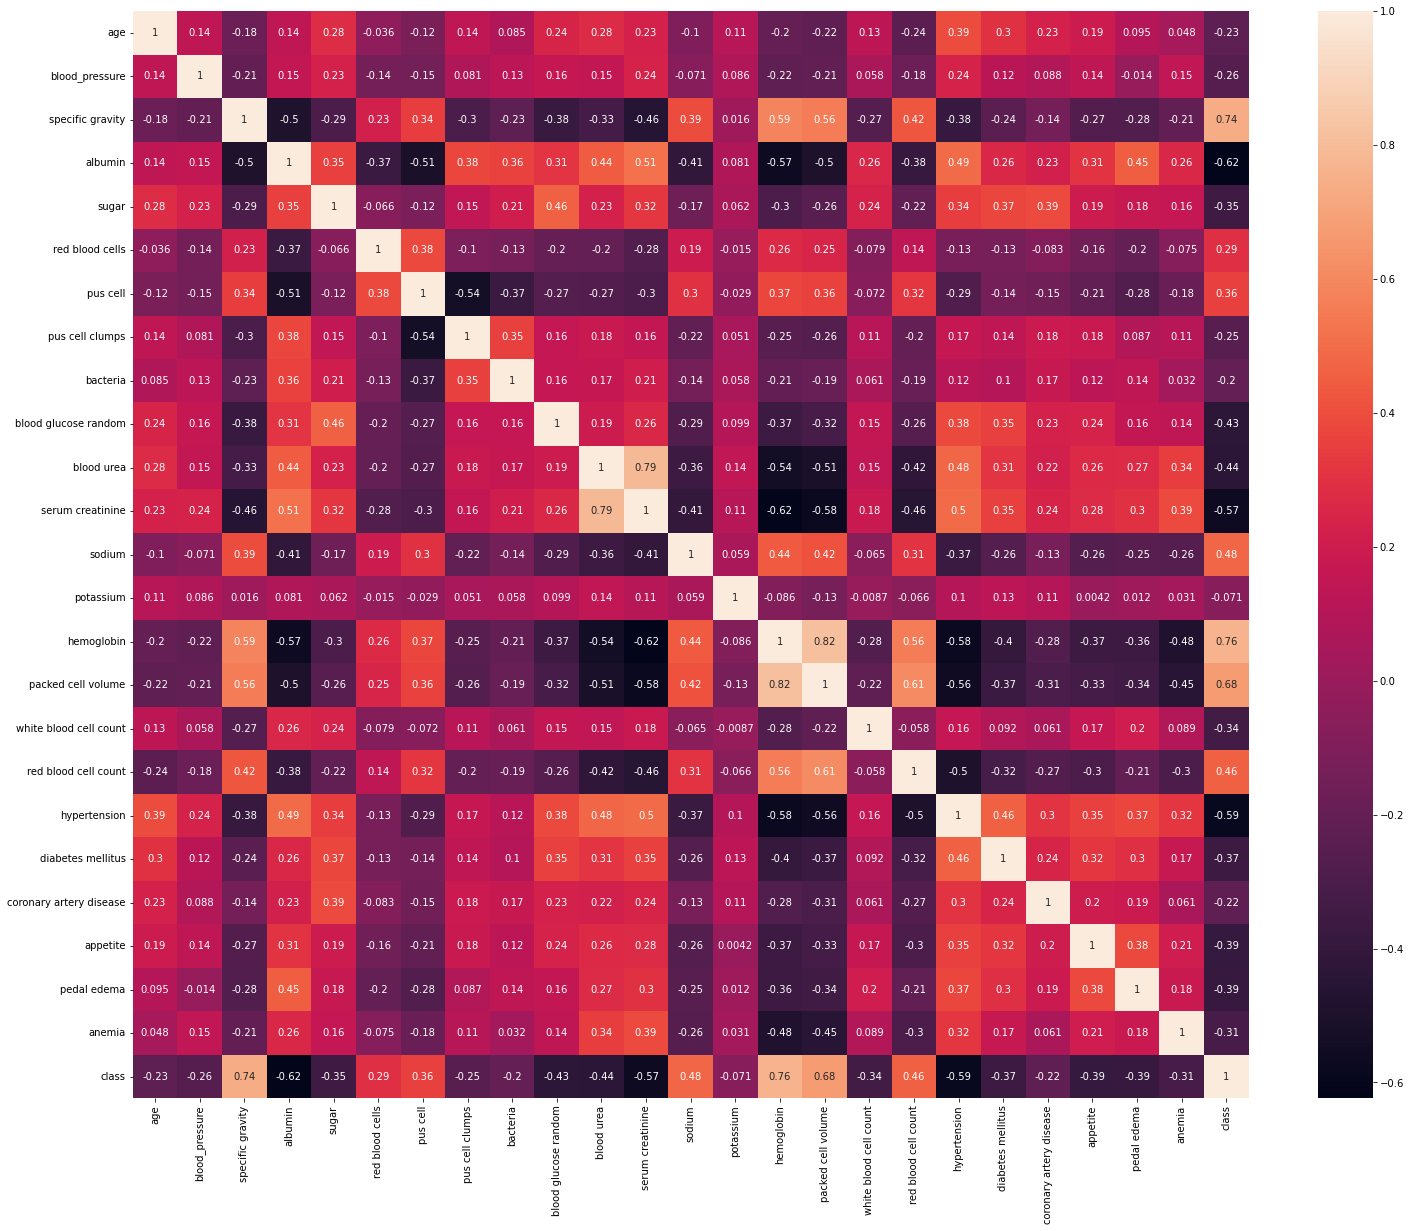

In [25]:
fig = plt.figure(figsize=(25, 20))
sns.heatmap(data_.corr(), annot = True)
plt.savefig('heatmap.png')

There exist multicollinearity as some of the features in the dataset are highly correlated with each other which is against the rule of Logistic Regression.

In [222]:
#feature extraction
X = data_[['specific gravity', 'albumin', 'hemoglobin', 'packed cell volume', 'hypertension', 'serum creatinine']].values
y = data_['class'].values

In [223]:
#do feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

#Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
X_pca = pca.fit_transform(X_scaled)

X_pca = pd.DataFrame(X_pca)
print(X_pca.head())
print("\nsize: ")
print(X_pca.shape)

#get explained variances
#print ('Varainces (percentage):')
#print(pca.explained_variance_ratio_*100)
#print()

#make the scree plot
#plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
#plt.xlabel("Number of components (Dimensions)")
#plt.ylabel ("Explained varince (%)")

          0         1         2         3         4         5
0 -0.611578  1.362150  0.508705 -0.871813 -0.748985 -0.405777
1  0.533201 -0.213017  1.505753 -0.100424  2.144608  0.158308
2  3.455378 -0.492069  1.392230 -0.388376 -0.428963 -0.480024
3  1.085050 -1.611403  0.486018 -0.399972  0.609782 -0.144769
4  1.463248  0.289992  1.415306 -1.323912  0.082274 -0.023477

size: 
(353, 6)


In [250]:
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, shuffle = True, random_state = 10)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_pca, y_train)

LogisticRegression()

In [251]:
#predict using the model

model.predict(X_test_pca)

array([2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 0, 2, 0])

In [252]:
X_test_pca

,0,1,2,3,4,5
247,-1.354799,-0.134957,-0.510318,-0.201496,0.362427,-0.342267
303,-2.028549,0.418129,-0.164054,0.203084,0.229006,-0.615572
219,-1.086983,-0.097623,-0.600406,0.058559,0.342831,0.053404
167,1.268748,0.112397,0.203463,-0.094721,-1.976095,-0.305679
205,-2.269773,0.392258,0.007370,0.028404,0.193010,-0.287093
...,...,...,...,...,...,...
211,-1.567193,-0.139801,-0.308353,-0.260326,0.255392,0.124812
229,-0.996400,0.578493,-0.610577,1.252992,0.129390,-0.230478
34,-0.336322,-1.613144,-0.516285,-0.748733,-0.444717,0.240287
225,-1.684628,0.414854,-0.392622,0.274713,0.408861,-0.322615


In [253]:
model.score(X_test_pca, y_test)

0.9859154929577465

In [254]:
print(f'Accuracy = {model.score(X_test_pca, y_test)}')

print('Accuracy = {: 2f}'.format(model.score(X_test_pca, y_test)))

Accuracy = 0.9859154929577465
Accuracy =  0.985915


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

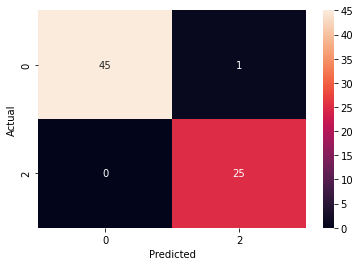

In [255]:
#Confusion Matrix

y_pred = model.predict(X_test_pca)

confusion_matrix = pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot = True)

In [256]:
from sklearn.metrics import classification_report
print(classification_report (y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        46
           2       0.96      1.00      0.98        25

    accuracy                           0.99        71
   macro avg       0.98      0.99      0.98        71
weighted avg       0.99      0.99      0.99        71



### KNN

In [319]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

K_model = KNeighborsClassifier(6)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size= 0.2, random_state=20)

In [320]:
K_model.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=6)

In [321]:
y_pred = K_model.predict(X_test_pca)

In [322]:
print(f'The Accuracy of the test model is {accuracy_score(y_pred,y_test)}')

The Accuracy of the test model is 1.0


In [323]:
print(f'The Accuracy of the training model is {accuracy_score(K_model.predict(X_train_pca),y_train)}')

The Accuracy of the training model is 0.9822695035460993


In [262]:
scores = []
for k in range(1,20):
  model = KNeighborsClassifier(k)
  model.fit(X_train_pca, y_train)
  y_pred = model.predict(X_test_pca)
  print(f'{k}:{accuracy_score(y_pred,y_test)}')
  scores.append(accuracy_score(y_pred,y_test))

1:0.9859154929577465
2:0.9859154929577465
3:0.9859154929577465
4:0.9859154929577465
5:0.9859154929577465
6:1.0
7:1.0
8:1.0
9:0.9859154929577465
10:0.9859154929577465
11:0.971830985915493
12:0.9859154929577465
13:0.9859154929577465
14:0.9859154929577465
15:0.971830985915493
16:0.971830985915493
17:0.971830985915493
18:0.971830985915493
19:0.971830985915493


The optimal value of K is 6

Text(0.5, 1.0, 'Testing Accuracy for different value of K')

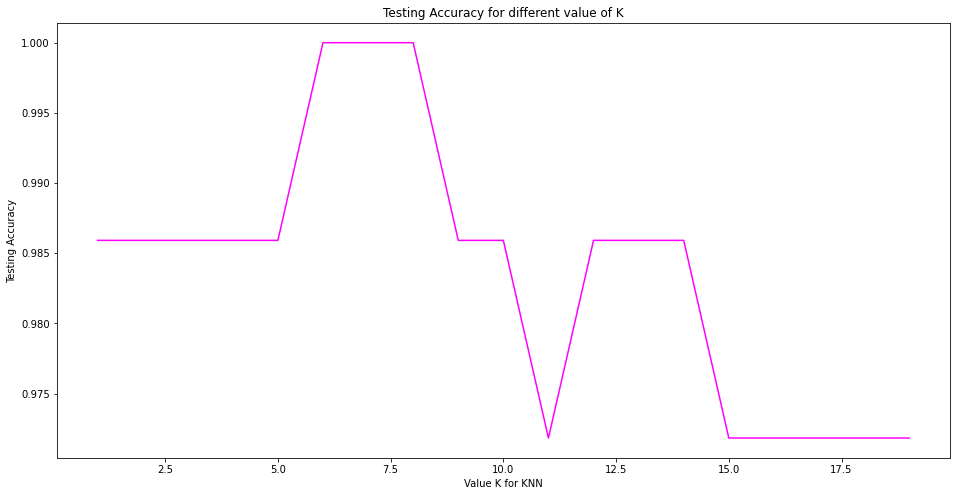

In [263]:
plt.figure(figsize = (16,8))
plt.plot(range(1,20),scores, color='magenta')
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')
plt.title('Testing Accuracy for different value of K')

### Decision Tree

In [264]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [265]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split (X_pca, y, test_size = 0.2, random_state = 40)
tree = tree.DecisionTreeClassifier()
tree.fit(X_train_pca, y_train)
y_pred = tree.predict(X_test_pca)
print(f'The Accuracy of the test model is {accuracy_score(y_pred,y_test)}')
print(f'The Accuracy of the training model is {accuracy_score(tree.predict(X_train_pca),y_train)}')

The Accuracy of the test model is 1.0
The Accuracy of the training model is 1.0


In [266]:
#from sklearn import tree
#tree.plot_tree(model),
#colors = 'Red'
#plt.figure(figsize = (16,8))

### Random Forest

In [267]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [268]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, shuffle = True, random_state = 20)
Random_forest_model = RandomForestClassifier(n_estimators = 100)
Random_forest_model.fit(X_train_pca, y_train)
y_pred = Random_forest_model.predict(X_test_pca)
print(f'The Accuracy of the test model is {accuracy_score(y_pred,y_test)}')
print(f'The Accuracy of the training model is {accuracy_score(Random_forest_model.predict(X_train_pca),y_train)}')

The Accuracy of the test model is 1.0
The Accuracy of the training model is 1.0


In [269]:
from sklearn.model_selection import cross_val_score

In [270]:
clf = RandomForestClassifier(n_estimators = 100)
scores = cross_val_score(clf, X_pca, y, cv = 5)
print(f'accuracy on each fold : {scores}')
print(f'average of the accuracy : {sum(scores)/5}')

accuracy on each fold : [1.         0.98591549 0.97183099 0.98571429 0.98571429]
average of the accuracy : 0.9858350100603623


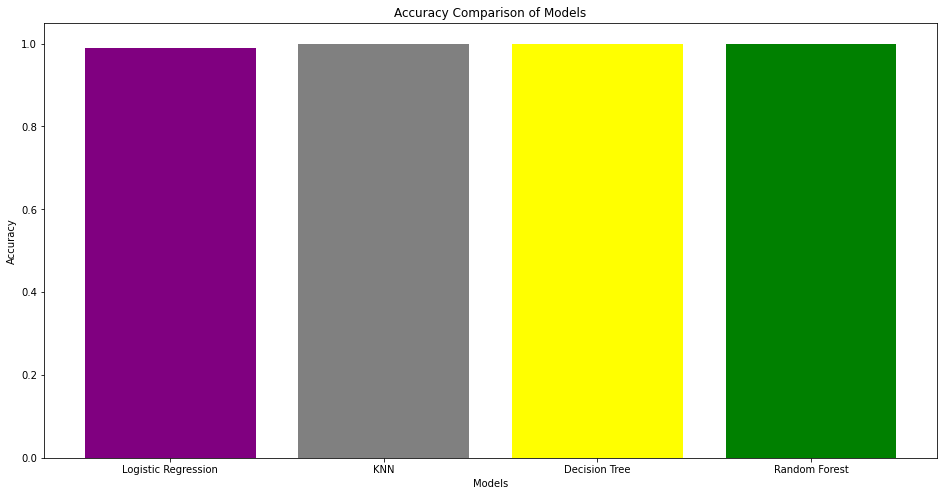

In [332]:
import matplotlib.pyplot as plt
import numpy as np 
fig = plt.figure(figsize = (16,8))
 #define the models and their accuracy scores
models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest']
accuracy_scores = [0.99, 1.0, 1.0, 1.0]

# specify the colors for each bar
colors = ['purple', 'Grey', 'yellow', 'green']

#plot the bar graph
x_pos = np.arange(len(models))
plt.bar(x_pos, accuracy_scores, align ='center', color = colors)
plt.xticks(x_pos, models)
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.title('Accuracy Comparison of Models')
plt.show()

As illustrated in the summary plot, all Algorithms are good for building a model. KNN, Decsion Tree and Random Forest produce best test and training accuracy.

### Heirarchical Clustering

In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [277]:
from sklearn.cluster import AgglomerativeClustering 

Agg_model = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='complete')

In [278]:
data_.drop(['class'], axis = 1)

,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia
0,38,4,4,1,0,1,1,0,0,48,...,84,26,34,27,1,4,1,0,0,0
1,4,0,4,5,0,1,1,0,0,70,...,42,20,18,27,0,3,1,0,0,0
2,38,2,0,5,0,1,0,1,0,44,...,41,14,24,14,1,3,1,1,1,1
3,41,4,1,3,0,1,1,0,0,33,...,45,17,30,21,0,3,1,0,0,0
4,50,5,2,4,0,1,1,0,0,2,...,51,21,34,19,1,4,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,45,4,4,0,0,1,1,0,0,64,...,87,29,24,24,0,3,1,0,0,0
349,32,2,5,0,0,1,1,0,0,3,...,95,36,34,37,0,3,1,0,0,0
350,7,4,4,0,0,1,1,0,0,27,...,88,31,23,29,0,3,1,0,0,0
351,10,1,5,0,0,1,1,0,0,41,...,72,33,29,34,0,3,1,0,0,0


In [279]:
X = data_[['hemoglobin', 'packed cell volume']]

In [280]:
Agg_model.fit(X)

AgglomerativeClustering(affinity='euclidean', linkage='complete')

In [287]:
clust_labels = Agg_model.fit_predict(X)

clust_df = pd.DataFrame(clust_labels)

clust_df.value_counts()

0    188
1    165
dtype: int64

In [288]:
new_data = pd.concat([data_, clust_df], axis= 1)

new_data.head()

,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class,0
0,38,4,4,1,0,1,1,0,0,48,...,34,27,1,4,1,0,0,0,0,1
1,4,0,4,5,0,1,1,0,0,70,...,18,27,0,3,1,0,0,0,0,0
2,38,2,0,5,0,1,0,1,0,44,...,24,14,1,3,1,1,1,1,0,0
3,41,4,1,3,0,1,1,0,0,33,...,30,21,0,3,1,0,0,0,0,0
4,50,5,2,4,0,1,1,0,0,2,...,34,19,1,4,1,0,1,0,0,0


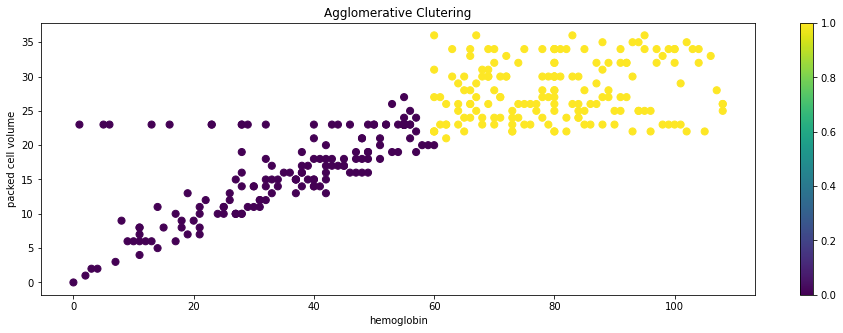

In [289]:
import matplotlib.pyplot as plt
fig =plt.figure(figsize=(16,5))
ax = fig.add_subplot(1,1,1)
scatter = ax.scatter(data_['hemoglobin'] , data_['packed cell volume'], s=50, c=clust_df[0])
#specific gravity', 'albumin', 'hemoglobin', 'packed cell volume', 'hypertension', 'serum creatinine

ax.set_title("Agglomerative Clutering")
ax.set_xlabel("hemoglobin")
ax.set_ylabel("packed cell volume")
plt.colorbar(scatter)

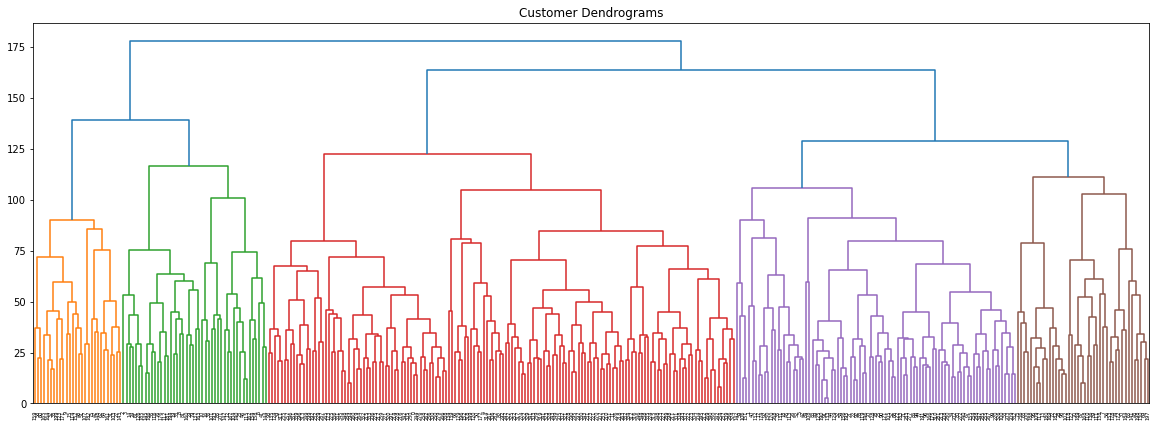

In [290]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20,7))
plt.title("Customer Dendrograms")

dend=shc.dendrogram(shc.linkage(data_, method="complete"))

In [291]:
from pandas.core.common import random_state
from sklearn.cluster import KMeans

model2 = KMeans(n_clusters=5,random_state=0)

X_train = X.loc[:319]
X_test = X.loc[319:]


model2.fit(X_train)

KMeans(n_clusters=5, random_state=0)

In [292]:
data_.shape

(353, 25)

In [293]:
labels = pd.DataFrame(model2.labels_)

labels.head()

,0
0,1
1,3
2,3
3,0
4,0


In [294]:
new_df = pd.concat([data_.loc[:320],labels], axis=1)

# new_df.iloc[5].rename({
#     0: 'Cluster'
# })

new_df.head()

,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class,0
0,38,4,4,1,0,1,1,0,0,48,...,34,27,1,4,1,0,0,0,0,1.0
1,4,0,4,5,0,1,1,0,0,70,...,18,27,0,3,1,0,0,0,0,3.0
2,38,2,0,5,0,1,0,1,0,44,...,24,14,1,3,1,1,1,1,0,3.0
3,41,4,1,3,0,1,1,0,0,33,...,30,21,0,3,1,0,0,0,0,0.0
4,50,5,2,4,0,1,1,0,0,2,...,34,19,1,4,1,0,1,0,0,0.0


In [295]:
new_df[0].value_counts().sort_values(ascending=False)

0.0    101
1.0     78
3.0     68
4.0     38
2.0     35
Name: 0, dtype: int64

In [296]:
y_pred = model2.predict(X_test)

In [297]:
y_pred

array([1, 4, 1, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 4, 1, 4, 4, 1, 1, 4, 4, 4,
       1, 4, 1, 4, 1, 0, 1, 4, 4, 4, 1, 4], dtype=int32)

In [298]:
model2.cluster_centers_

array([[54.45544554, 22.26732673],
       [74.6025641 , 27.73076923],
       [12.6       ,  9.22857143],
       [33.82352941, 15.35294118],
       [96.13157895, 27.84210526]])

In [299]:
from sklearn.metrics import silhouette_score
print (f'Silhouette score(n=2): {silhouette_score(X_train,model2.predict(X_train))}')

Silhouette score(n=2): 0.5155287366893401


In [300]:
print (f'Silhouette score(n=2): {silhouette_score(X_train,model2.predict(X_train))}')

Silhouette score(n=2): 0.5155287366893401


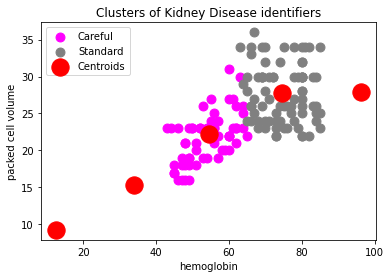

In [302]:
plt.scatter(new_df["hemoglobin"][new_df[0] == 0],          
            new_df["packed cell volume"][new_df[0] == 0],s=80,c='magenta',label='Careful')
plt.scatter(new_df["hemoglobin"][new_df[0] == 1],
           new_df["packed cell volume"][new_df[0] == 1],s=80,c='grey',label='Standard')
#plt.scatter(new_df["hemoglobin"][new_df[0] == 2],
           #new_df["packed cell volume"][new_df[0]  == 2],s=80,c='green',label='Target')
#plt.scatter(new_df["hemoglobin"][new_df[0]  == 3], 
           #new_df["packed cell volume"][new_df[0]  == 3],s=80,c='cyan',label='Careless')
#plt.scatter(new_df["hemoglobin"][new_df[0]  == 4], 
           #new_df["packed cell volume"][new_df[0]  == 4],s=80,c='burlywood',label='Sensible')
plt.scatter(model2.cluster_centers_[:, 0], model2.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Kidney Disease identifiers')
plt.xlabel('hemoglobin')
plt.ylabel('packed cell volume')
plt.legend()
plt.show()

In [326]:
# Best K value 

sum_of_squared_dist = []

for i in range(1,10):
  model = KMeans(n_clusters=i)
  model.fit(X_train)
  sum_of_squared_dist.append(model.inertia_)

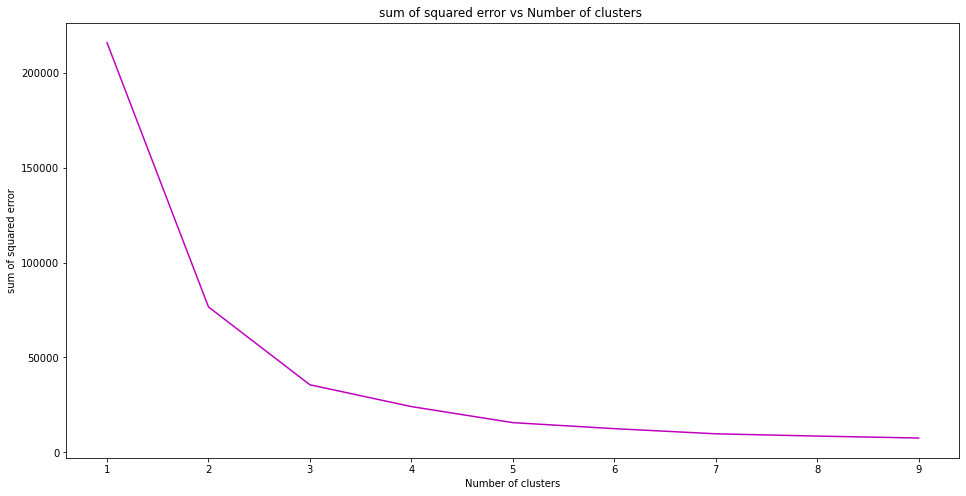

In [327]:
plt.figure(figsize=(16,8))

plt.plot(range(1,10), sum_of_squared_dist, color='m' )
plt.xlabel ('Number of clusters')
plt.ylabel ('sum of squared error')
plt.title('sum of squared error vs Number of clusters ')
plt.show()